In [1]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))


# CARTERAS CON CUATRO ACTIVOS

En este notebook, vamos a construir carteras de inversión con cuatro activos. Aprenderemos a calcular la rentabilidad y volatilidad usando matrices y a generar múltiples carteras con pesos aleatorios para los activos. Este proceso nos ayudará a entender el impacto de la asignación de activos en el rendimiento y el riesgo de una cartera.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Ejercicio 1

Con la siguiente matriz de varianza-covarianzas y las rentabilidades esperadas (medias), determina la desviación típica y la rentabilidad media de las carteras X e Y.

In [2]:
matriz_covarianzas = np.array([[0.10, 0.01, 0.03, 0.05],
                               [0.01, 0.30, 0.06, -0.04],
                               [0.03, 0.06, 0.40, 0.02],
                               [0.05,-0.04, 0.02, 0.50]])
print(matriz_covarianzas)

[[ 0.1   0.01  0.03  0.05]
 [ 0.01  0.3   0.06 -0.04]
 [ 0.03  0.06  0.4   0.02]
 [ 0.05 -0.04  0.02  0.5 ]]


In [3]:
rentabilidad_medias = np.array([0.06, 0.08, 0.1, 0.15])
print(rentabilidad_medias)

[0.06 0.08 0.1  0.15]


In [4]:
pesos_x = np.array([0.2, 0.3, 0.4, 0.1])
pesos_y = np.array([0.2, 0.1, 0.1, 0.6])
print(pesos_x)
print(pesos_y)

[0.2 0.3 0.4 0.1]
[0.2 0.1 0.1 0.6]


**Rentabilidad** de la cartera $E(\tilde R_p)=\sum_{i=1}^{N}w_i E(\tilde R_i)$

$E(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix}  \begin{pmatrix}\mu_1 \\\mu_2  \\...  \\ \mu_N\end{pmatrix} = \mathbf{w}^T\mathbf{\mu}$

In [5]:
# TO-DO Calcula la rentabilidad media de las dos carteras

mu_x = pesos_x.T @ rentabilidad_medias
mu_y = pesos_y.T @ rentabilidad_medias  
print("Rentabilidad media de cartera X: {:.4f}".format(mu_x))
print("Rentabilidad media de cartera Y: {:.4f}".format(mu_y))

Rentabilidad media de cartera X: 0.0910
Rentabilidad media de cartera Y: 0.1200


$\sigma²(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix} \begin{pmatrix}\sigma_1^2 & \sigma_{12}^2 & ... & \sigma_{1N}^2\\ 
 \sigma_{21}^2& \sigma_2^2 &...  & \sigma_{2N}^2\\ ... & ... & ... & ...\\  \sigma_{N1}^2& \sigma_{N2}^2 & ... & \sigma_N^2\end{pmatrix} \begin{pmatrix}w_1 \\w_2  \\...  \\ w_N\end{pmatrix} = \mathbf{w}^T\mathbf{C}\mathbf{w}$

In [6]:
# TO-DO Calcula la desviación típica de las dos carteras
sigma_x = np.sqrt(pesos_x.T @ matriz_covarianzas @ pesos_x)
sigma_y = np.sqrt(pesos_y.T @ matriz_covarianzas @ pesos_y)

print("Desviación típica de cartera X: {:.4f}".format(sigma_x))
print("Desviación típica de cartera Y: {:.4f}".format(sigma_y))

Desviación típica de cartera X: 0.3487
Desviación típica de cartera Y: 0.4510


---

### Ejercicio 2

Determina la covarianza de las dos carteras X e Y.

$covar(X,Y)=\begin{pmatrix}x_1 & x_2 & ... & x_N\end{pmatrix} \begin{pmatrix}\sigma_1^2 & \sigma_{12}^2 & ... & \sigma_{1N}^2\\ 
 \sigma_{21}^2& \sigma_2^2 &...  & \sigma_{2N}^2\\ ... & ... & ... & ...\\  \sigma_{N1}^2& \sigma_{N2}^2 & ... & \sigma_N^2\end{pmatrix} \begin{pmatrix}y_1 \\y_2  \\...  \\ y_N\end{pmatrix} = \mathbf{X}^T\mathbf{C}\mathbf{Y}$

In [7]:
# TO-DO Calcula la covarianza entre las dos carteras X e Y

covar_XY = pesos_x.T @ matriz_covarianzas @ pesos_y

print("Covarianzas entre X e Y: {:.4f}".format(covar_XY))

Covarianzas entre X e Y: 0.0714


---

### Ejercicio 3

Crea una cartera en la que inviertes el 30% en la cartera X y el 70% restante en la cartera Y y determina su rentabilidad esperada y su desviación típica.

In [11]:
# TO-DO Define los pesos de la nueva cartera y calcula la rentabilidad media

pesos_xy = np.array([0.3, 0.7])
rent_xy = np.array([mu_x, mu_y])

mu_xy = pesos_xy.T @ rent_xy
print("Rentabilidad de la nueva cartera XY: {:.4f}".format(mu_xy))

Rentabilidad de la nueva cartera XY: 0.1113


In [13]:
# TO-DO Estima la matriz de varianzas-covarianzas

#Definimos la matriz de varianzas.
S_carteras = np.array([[sigma_x**2, covar_XY],
                       [covar_XY, sigma_y**2]])
print(S_carteras)

[[0.1216 0.0714]
 [0.0714 0.2034]]


In [14]:
# TO-DO Calcula la desviación típica
sigma_xy = np.sqrt(pesos_xy.T @ S_carteras @ pesos_xy)
print("Desviación típica de la nueva cartera XY: {:.4f}".format(sigma_xy))

Desviación típica de la nueva cartera XY: 0.3750


---

### Ejercicio 4

Genera 100 carteras empezando invirtiendo 0% de tu presupuesto en X hasta el 100% de tu presupuesto en X.

In [20]:
# TO-DO Genera 100 carteras cambiando sus pesos y calcula la media y desviación de cada una

mus = []
sigmas = []

pesos = np.linspace(0, 1, 101)

for w1 in pesos:
    pesos_cartera = np.array([w1, 1-w1])
    mu = pesos_cartera.T @ rent_xy
    sigma = np.sqrt(pesos_cartera.T @ S_carteras @ pesos_cartera)
    mus.append(mu)
    sigmas.append(sigma)


Representa gráficamente las 100 carteras, dibujando además las dos carteras iniciales.

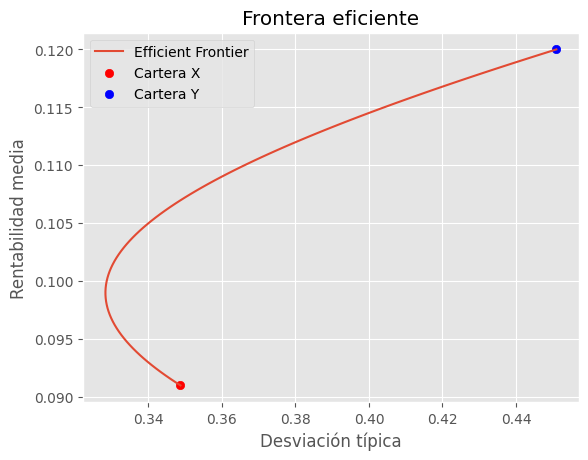

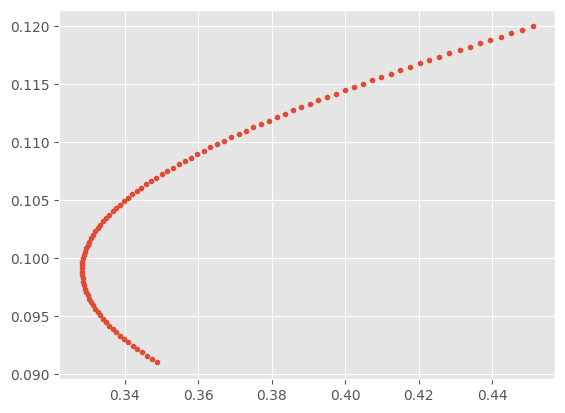

In [22]:
# TO-DO Dibuja las 100 carteras y las dos carteras iniciales
plt.plot(sigmas, mus, label='Efficient Frontier')
plt.scatter(sigma_x, mu_x, c='red', label='Cartera X')
plt.scatter(sigma_y, mu_y, c='blue', label='Cartera Y')
plt.xlabel('Desviación típica')
plt.ylabel('Rentabilidad media')
plt.title('Frontera eficiente')
plt.legend()
plt.show()

plt.plot(sigmas, mus,'.')



Genera una nueva figura añadiendo, además, los cuatro activos.

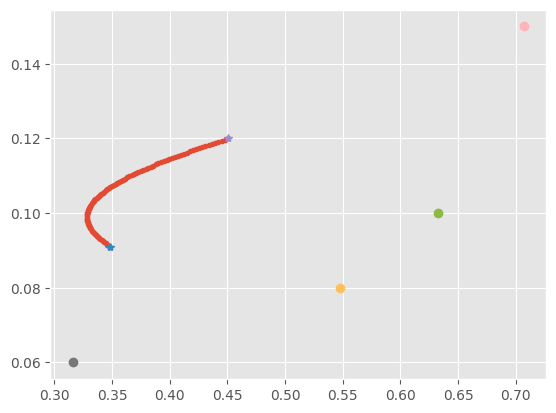

In [23]:
# TO-DO Vuelve a generar la figura añadiendo los 4 activos
plt.plot(sigmas, mus, '.')
plt.plot(sigma_x, mu_x, '*')
plt.plot(sigma_y, mu_y, '*')

for i in range(4):
    plt.plot(np.sqrt(matriz_covarianzas[i,i]), rentabilidad_medias[i], 'o')

---

### Ejercicio 5

Genera 10.000 carteras aleatorias, calcula sus rentabilidades medias y sus desviaciones típicas y represéntalas gráficamente junto a la figura anterior.

In [36]:
num_carteras = 10000
num_activos = 4

# TO-DO Genera las 10000 carteras aleatorias

pesos = np.random.rand(num_carteras, num_activos)
pesos = pesos / pesos.sum(axis=1, keepdims=True)
print(pesos.shape)
print(pesos.sum(axis=1))

(10000, 4)
[1. 1. 1. ... 1. 1. 1.]


In [31]:
# TO-DO Calcula las rentabilidades y las desviaciones típicas de las 10000 carteras
medias = pesos @ rentabilidad_medias
desviaciones = np.sqrt(np.diag(pesos @ matriz_covarianzas @ pesos.T))

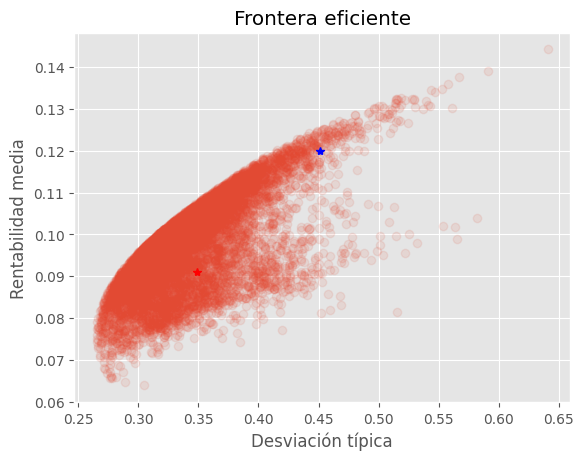

In [32]:
# TO-DO Añade a la figura previa las 10000 carteras 

plt.plot(desviaciones, medias, 'o', alpha=0.1)
plt.plot(sigma_x, mu_x, '*', c='red')
plt.plot(sigma_y, mu_y, '*', c='blue')
plt.xlabel('Desviación típica')
plt.ylabel('Rentabilidad media')
plt.title('Frontera eficiente')
plt.show()

## Conclusión

Si llamamos:

* $n$ al número de activos en la cartera

* $w_i$ a la proporción de la inversión en el activo $i$ $\Rightarrow \sum_{i=1}^{n}w_i=1$

* $\bar R_i$ a la rentabilidad media del activo $i$

* $\sigma_{ij}$ a la covarianza entre los activos $i$ y $j$

Entonces:

* **Rentabilidad media** de la cartera $E(\tilde R_p) = \bar R_p = \sum_{i=1}^{N}w_i E(\tilde R_i)$

* **Varianza** de la cartera: $\sigma²(\tilde R_p) = \sigma_p^2= \underset{Varianzas\ activos} {\underbrace{\sum_{i=1}^{N} w_i²} \sigma _i²} + \underset{Relación\ entre\ activos} {\underbrace{\sum_{i=1}^{N}\sum_{j=1}^{N}w_iw_j\sigma_{ij}}}$


* **Coeficiente de correlación** entre los activos $i$ y $j$: $\rho_{ij}=\dfrac{\sigma_{ij}}{\sigma_i\sigma_j}$
 
La varianza de la cartera se puede expresar de forma matricial como:

$\sigma²(\tilde R_p)=\begin{pmatrix}w_1 & w_2 & ... & w_N\end{pmatrix} \begin{pmatrix}\sigma_1^2 & \sigma_{12}^2 & ... & \sigma_{1N}^2\\ 
 \sigma_{21}^2& \sigma_2^2 &...  & \sigma_{2N}^2\\ ... & ... & ... & ...\\  \sigma_{N1}^2& \sigma_{N2}^2 & ... & \sigma_N^2\end{pmatrix} \begin{pmatrix}w_1 \\w_2  \\...  \\ w_N\end{pmatrix} = \mathbf{w}^T\mathbf{C}\mathbf{w}$

**Observación**: En python, recuerda ajustar los shapes de las matrices para que "todo encaje". Puede verse afectada la fórmula matemática.